In [1]:
%load_ext autoreload
%autoreload 2

# Augmentation

In [2]:
import pathlib

import cdmetadl.helpers.general_helpers
import cdmetadl.dataset

path_to_dataset = "/fastdata/vilab24/meta-album"

dataset_path = pathlib.Path(path_to_dataset)
dataset_info_dict = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["SPT"])

dataset = cdmetadl.dataset.ImageDataset("Sports", dataset_info_dict["SPT"])
device = cdmetadl.helpers.general_helpers.get_device()

In [3]:
import cdmetadl.samplers

n_way_sampler = cdmetadl.samplers.ValueSampler(value=5)
k_shot_sampler = cdmetadl.samplers.ValueSampler(value=4)

task = dataset.generate_task(n_way_sampler, k_shot_sampler, query_size=4)

## Standard Augmentation

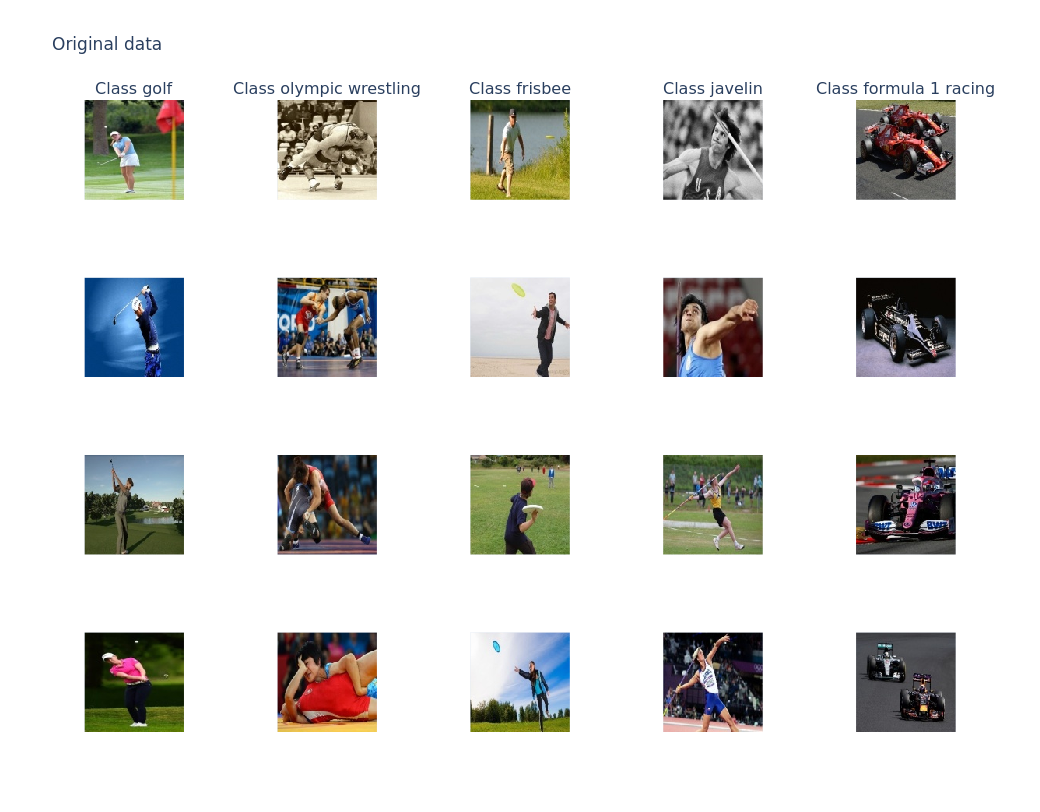

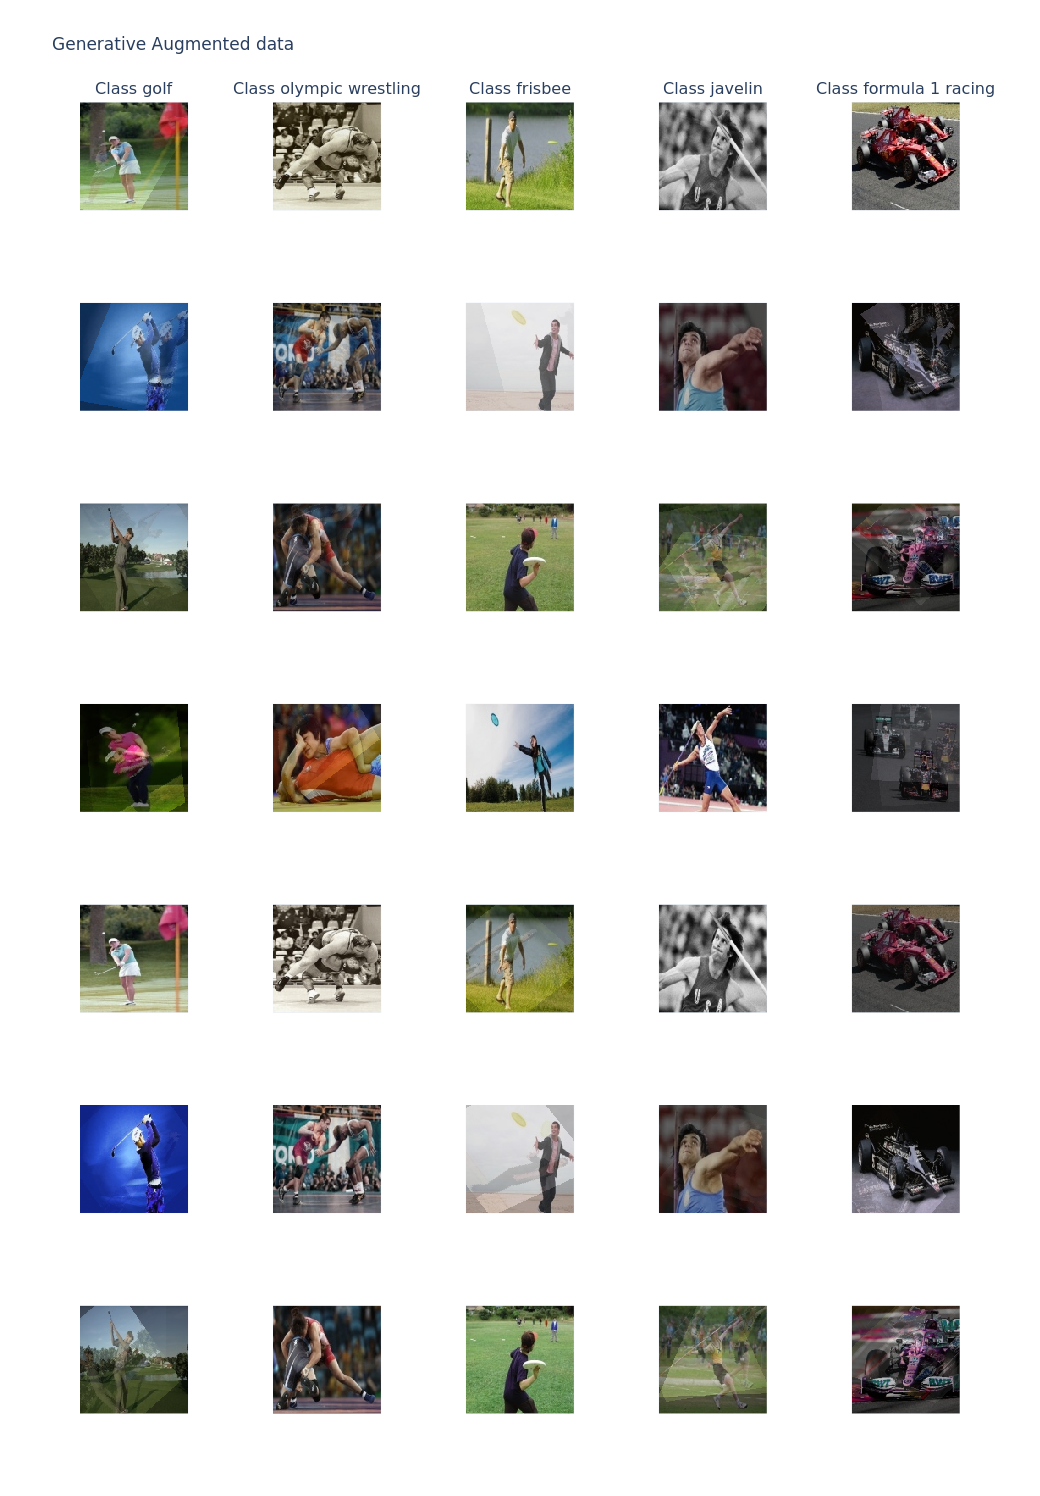

SetData(images=tensor([[[[0.1633, 0.2164, 0.1568,  ..., 0.1121, 0.1371, 0.1371],
          [0.1664, 0.1570, 0.1287,  ..., 0.0999, 0.1374, 0.1687],
          [0.0572, 0.0509, 0.0756,  ..., 0.1221, 0.1440, 0.1532],
          ...,
          [0.7557, 0.7431, 0.7440,  ..., 0.5422, 0.5483, 0.5608],
          [0.7346, 0.7425, 0.7362,  ..., 0.5797, 0.5795, 0.5827],
          [0.6144, 0.6050, 0.6144,  ..., 0.5203, 0.5201, 0.5139]],

         [[0.1900, 0.2432, 0.1746,  ..., 0.0972, 0.1193, 0.1193],
          [0.1901, 0.1808, 0.1465,  ..., 0.0939, 0.1285, 0.1598],
          [0.0870, 0.0777, 0.0935,  ..., 0.1281, 0.1470, 0.1502],
          ...,
          [0.8479, 0.8354, 0.8331,  ..., 0.6166, 0.6167, 0.6292],
          [0.8246, 0.8332, 0.8222,  ..., 0.6541, 0.6479, 0.6511],
          [0.6798, 0.6704, 0.6798,  ..., 0.5946, 0.5885, 0.5822]],

         [[0.1395, 0.1926, 0.1389,  ..., 0.1091, 0.1490, 0.1550],
          [0.1515, 0.1421, 0.1168,  ..., 0.0969, 0.1493, 0.1865],
          [0.0632, 0.0628, 

In [7]:
import cdmetadl.augmentation
from cdmetadl.notebooks.helpers import create_plot

standard_augmentor = cdmetadl.augmentation.StandardAugmentation(
    augmentation_size={
        "scale": 1,
        "threshold": 0.75,
        "maximum": 20,
        "offset": 3
    }, keep_original_data=False, device=device
)
create_plot(standard_augmentor, task, conf_scores=[0.0, 0.0, 0.0, 0.0, 0.0])

## Pseudo Augmenation

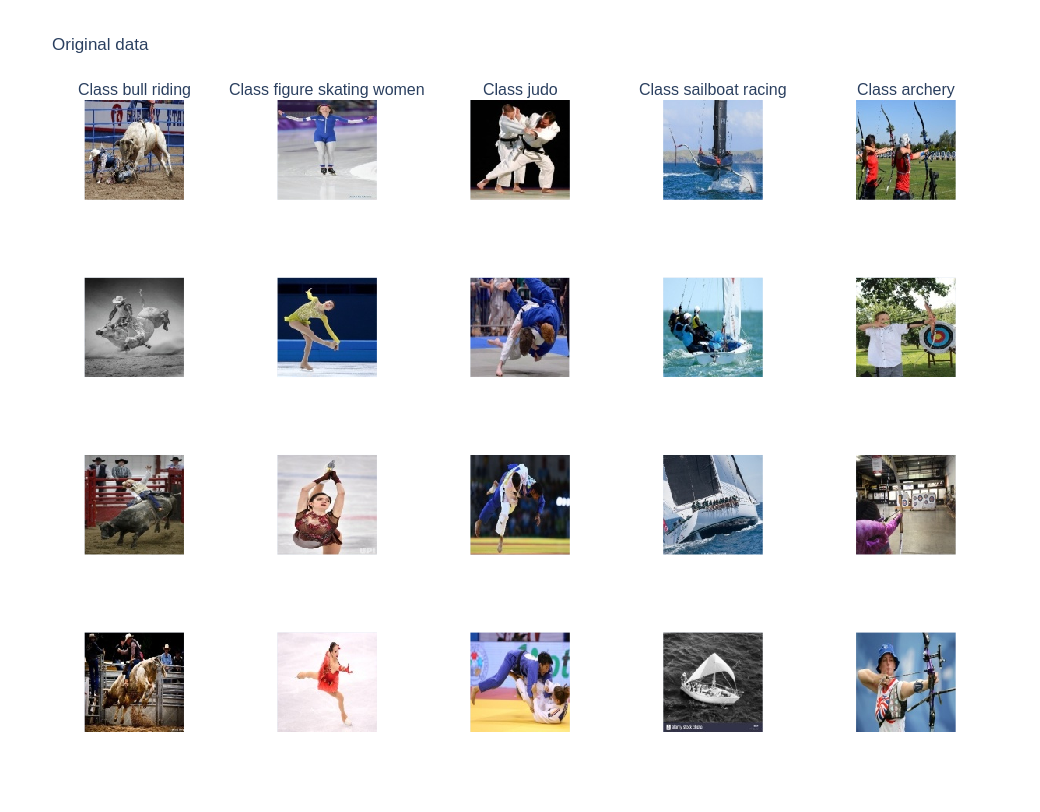

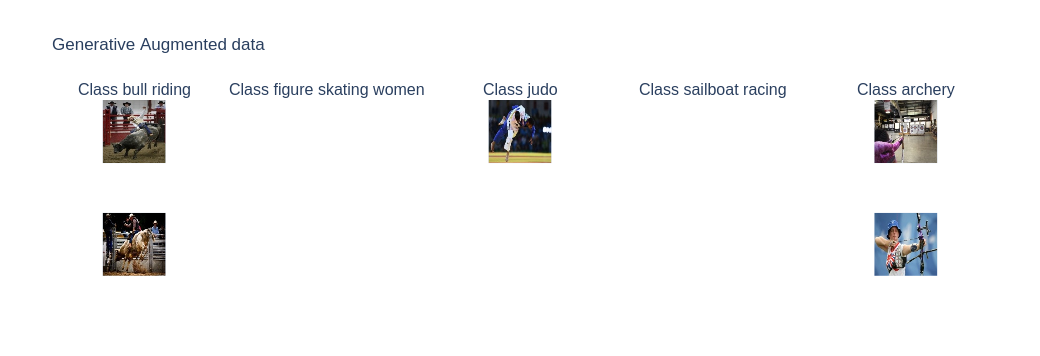

In [ ]:
import cdmetadl.augmentation
import cdmetadl.notebooks.helpers

pseudo_augmentor = cdmetadl.augmentation.PseudoAugmentation(threshold=0.75, scale=1.0, keep_original_data=False)
create_plot(pseudo_augmentor, task, conf_scores=[0.0, 1.0, 0.5, 0.75, 0.3])

## Generative Augmentation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

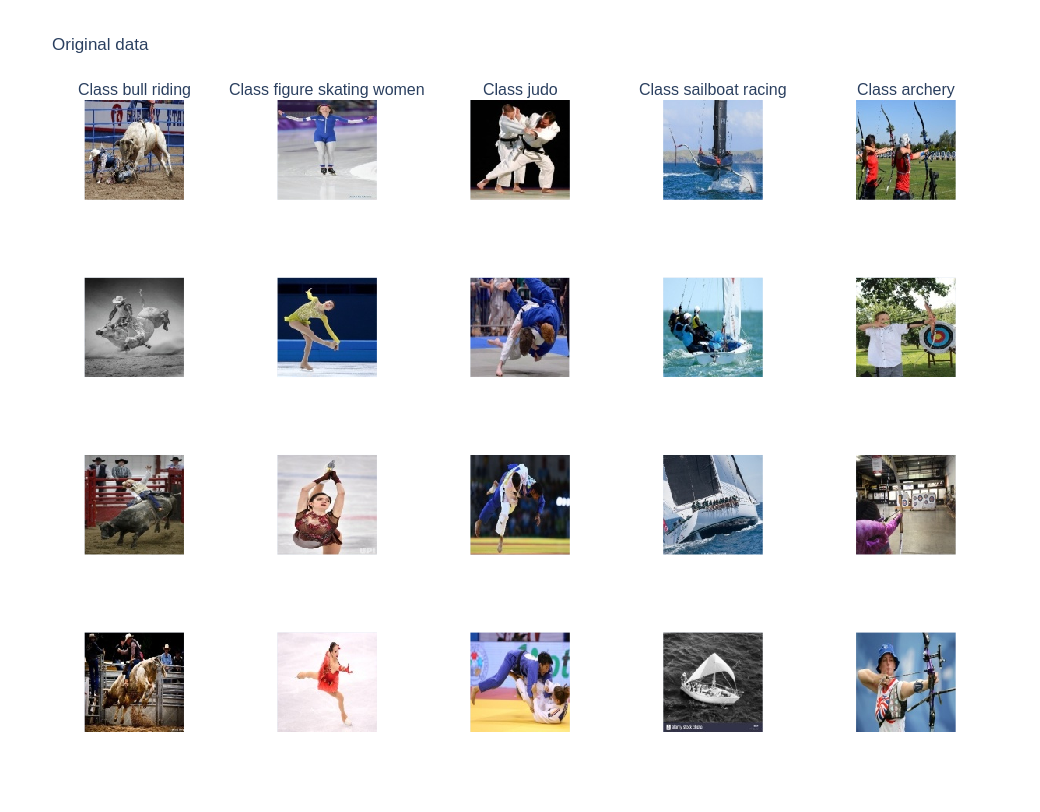

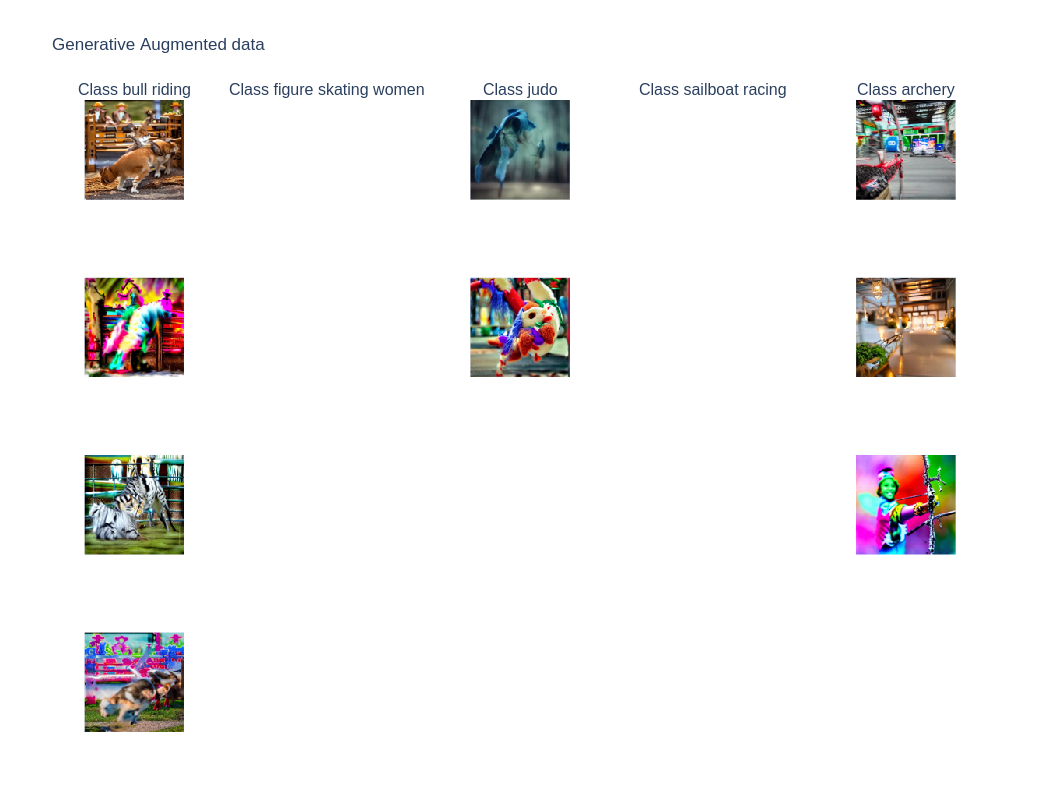

In [ ]:
import cdmetadl.augmentation
import cdmetadl.notebooks.helpers

generative_augmentor = cdmetadl.augmentation.GenerativeAugmentation(threshold=0.75, scale=1.0, keep_original_data=False, annotator_type="hed")
create_plot(generative_augmentor, task, conf_scores=[0.0, 1.0, 0.5, 0.75, 0.3])